<a href="https://colab.research.google.com/github/zarrinan/DS-Sprint-01-Dealing-With-Data/blob/master/DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [0]:
# TODO
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [0]:
bc = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data')
! curl http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data

In [7]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data | wc
!ls

haberman.data  haberman.data.1	sample_data


In [0]:
print(bc.shape)
print(bc.info())
print(bc.describe())
bc.head()


Attribute Information:
   1. Age of patient at time of operation (numerical)
   2. Patient's year of operation (year - 1900, numerical)
   3. Number of positive axillary nodes detected (numerical)
   4. Survival status (class attribute)
         1 = the patient survived 5 years or longer
         2 = the patient died within 5 year

In [0]:
col_names = ['age', 'operation year 1900+', 'pos nodes', 'survival status']

In [0]:
bcs = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data', header=None, names=col_names)

In [0]:
print(bcs.shape)
print(bcs.info())
print(bcs.describe())
bcs.head()

In [0]:
bcs.isna().sum().sum()

In [0]:
bcs['if_survived'] = bcs['survival status'].apply(lambda val: 0 if val == 2 else 1)


In [28]:
bcs.head(50)

,age,operation year 1900+,pos nodes,survival status,if_survived
0,30,64,1,1,1
1,30,62,3,1,1
2,30,65,0,1,1
3,31,59,2,1,1
4,31,65,4,1,1
5,33,58,10,1,1
6,33,60,0,1,1
7,34,59,0,2,0
8,34,66,9,2,0
9,34,58,30,1,1


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [29]:
# TODO
bcs.describe()

,age,operation year 1900+,pos nodes,survival status,if_survived
count,306.000000,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706,0.735294
std,10.803452,3.249405,7.189654,0.441899,0.441899
min,30.000000,58.000000,0.000000,1.000000,0.000000
25%,44.000000,60.000000,0.000000,1.000000,0.000000
50%,52.000000,63.000000,1.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000,1.000000
max,83.000000,69.000000,52.000000,2.000000,1.000000


(array([16., 27., 46., 53., 55., 41., 41., 18.,  7.,  2.]),
 array([30. , 35.3, 40.6, 45.9, 51.2, 56.5, 61.8, 67.1, 72.4, 77.7, 83. ]),
 <a list of 10 Patch objects>)

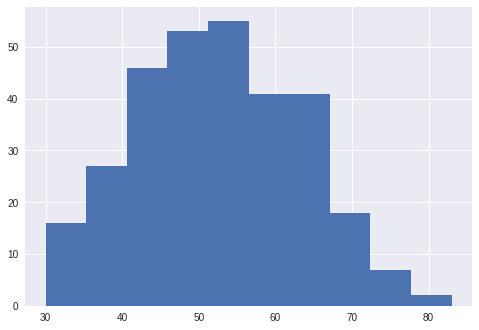

In [30]:
plt.hist(bcs['age'])

(array([63., 28., 26., 23., 30., 31., 28., 28., 25., 24.]),
 array([58. , 59.1, 60.2, 61.3, 62.4, 63.5, 64.6, 65.7, 66.8, 67.9, 69. ]),
 <a list of 10 Patch objects>)

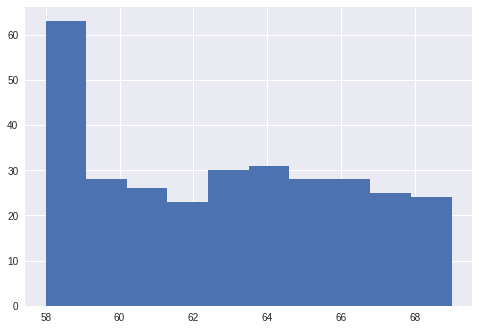

In [36]:
plt.hist(bcs['operation year 1900+'])

(array([ 81.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 225.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

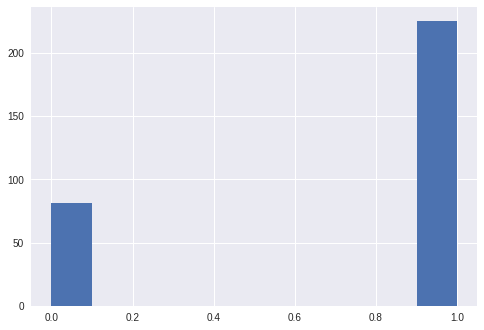

In [37]:
plt.hist(bcs['if_survived'])

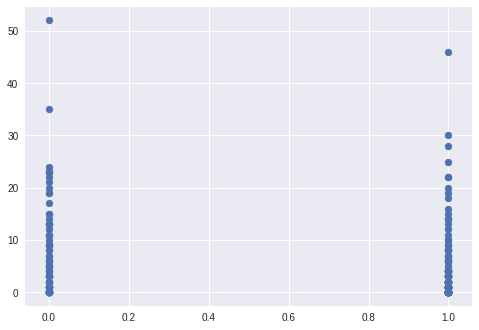

In [77]:
plt.scatter(bcs['if_survived'], bcs['pos nodes'])

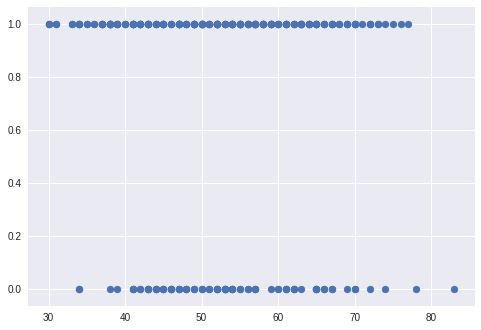

In [79]:
plt.scatter(bcs['age'], bcs['if_survived'])

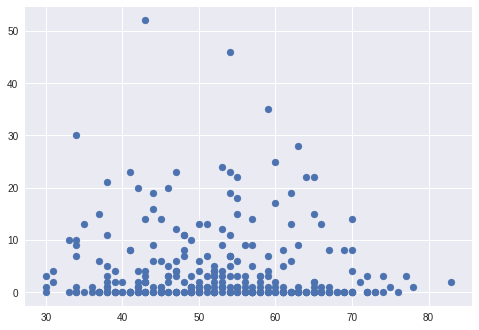

In [80]:
plt.scatter(bcs['age'], bcs['pos nodes'])

In [0]:
oper_year_bin = pd.cut(bcs['operation year 1900+'], bins=[0, 58, 61, 63, 65, 69])
age_bin = pd.cut(bcs['age'], bins=[0, 30, 35, 41,42,43, 44,45,46, 51,54, 57, 62, 67, 73, 78, 83])
pos_nodes_bin = pd.cut(bcs['pos nodes'], 5)


In [55]:
pd.crosstab(bcs['if_survived'], oper_year_bin, normalize='columns')

operation year 1900+,"(0, 58]","(58, 61]","(61, 63]","(63, 65]","(65, 69]"
if_survived,,,,,
0,0.333333,0.197531,0.283019,0.355932,0.220779
1,0.666667,0.802469,0.716981,0.644068,0.779221


In [56]:
pd.crosstab(bcs['if_survived'], bcs['operation year 1900+'], normalize='columns')

operation year 1900+,58,59,60,61,62,63,64,65,66,67,68,69
if_survived,,,,,,,,,,,,
0,0.333333,0.333333,0.142857,0.115385,0.304348,0.266667,0.258065,0.464286,0.214286,0.16,0.230769,0.363636
1,0.666667,0.666667,0.857143,0.884615,0.695652,0.733333,0.741935,0.535714,0.785714,0.84,0.769231,0.636364


In [86]:
pd.crosstab(bcs['if_survived'], age_bin, normalize='columns')

age,"(0, 30]","(30, 35]","(35, 41]","(41, 42]","(42, 43]","(43, 44]","(44, 45]","(45, 46]","(46, 51]","(51, 54]","(54, 57]","(57, 62]","(62, 67]","(67, 73]","(73, 78]","(78, 83]"
if_survived,,,,,,,,,,,,,,,,
0,0.0,0.153846,0.135135,0.222222,0.363636,0.428571,0.333333,0.571429,0.26087,0.368421,0.25,0.243243,0.264706,0.2,0.333333,1.0
1,1.0,0.846154,0.864865,0.777778,0.636364,0.571429,0.666667,0.428571,0.73913,0.631579,0.75,0.756757,0.735294,0.8,0.666667,0.0


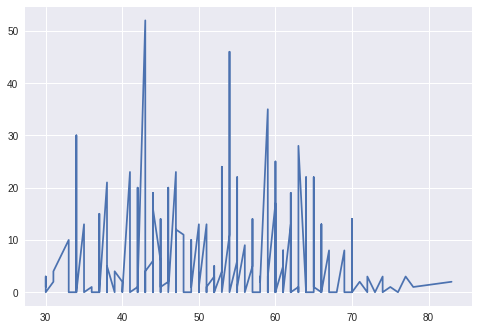

In [87]:
plt.plot(bcs['age'], bcs['pos nodes'])

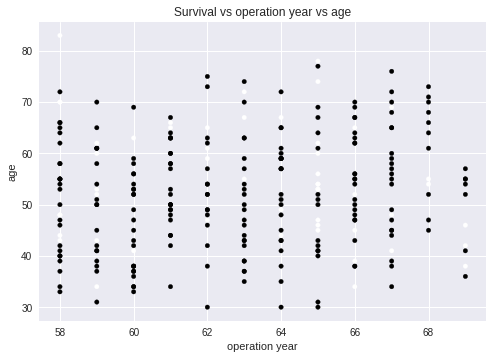

In [57]:
pointsize = 20;
plt.xlabel('operation year')
plt.ylabel('age')
plt.title('Survival vs operation year vs age')
plt.scatter(bcs['operation year 1900+'], bcs['age'], pointsize, bcs['if_survived']);

In [0]:
fig, ax = plt.subplots(figsize=(16,10))
sns.heatmap(bcs, annot=True, linewidths=.5, cmap="YlGnBu", ax=ax);

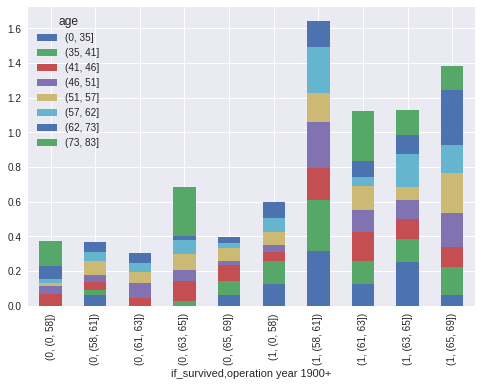

In [66]:
age_bin2 = pd.cut(bcs['age'], bins=[0, 35, 41,46, 51, 57, 62, 73, 83])

ds = pd.crosstab([bcs['if_survived'], oper_year_bin], age_bin2, bcs['if_survived'])
ds.plot(kind='bar', stacked=True)

In [71]:
ds2 = pd.crosstab([pos_nodes_bin, age_bin2], bcs['if_survived'], normalize='columns')
ds2

if_survived                     0         1
pos nodes      age                         
(-0.052, 10.4] (0, 35]   0.024691  0.053333
               (35, 41]  0.037037  0.133333
               (41, 46]  0.160494  0.102222
               (46, 51]  0.086420  0.146667
               (51, 57]  0.185185  0.182222
               (57, 62]  0.061728  0.120000
               (62, 73]  0.123457  0.168889
               (73, 83]  0.037037  0.017778
(10.4, 20.8]   (0, 35]   0.000000  0.004444
               (35, 41]  0.000000  0.008889
               (41, 46]  0.024691  0.017778
               (46, 51]  0.049383  0.004444
               (51, 57]  0.049383  0.008889
               (57, 62]  0.037037  0.000000
               (62, 73]  0.024691  0.004444
               (73, 83]  0.000000  0.000000
(20.8, 31.2]   (0, 35]   0.000000  0.004444
               (35, 41]  0.024691  0.000000
               (41, 46]  0.000000  0.000000
               (46, 51]  0.012346  0.000000
               (51, 57]  0.024691  0.004444
               (57, 62]  0.000000  0.004444
               (62, 73]  0.012346  0.008889
               (73, 83]  0.000000  0.000000
(31.2, 41.6]   (0, 35]   0.000000  0.000000
               (35, 41]  0.000000  0.000000
               (41, 46]  0.000000  0.000000
               (46, 51]  0.000000  0.000000
               (51, 57]  0.000000  0.000000
               (57, 62]  0.012346  0.000000
               (62, 73]  0.000000  0.000000
               (73, 83]  0.000000  0.000000
(41.6, 52.0]   (0, 35]   0.000000  0.000000
               (35, 41]  0.000000  0.000000
               (41, 46]  0.012346  0.000000
               (46, 51]  0.000000  0.000000
               (51, 57]  0.000000  0.004444
               (57, 62]  0.000000  0.000000
               (62, 73]  0.000000  0.000000
               (73, 83]  0.000000  0.000000

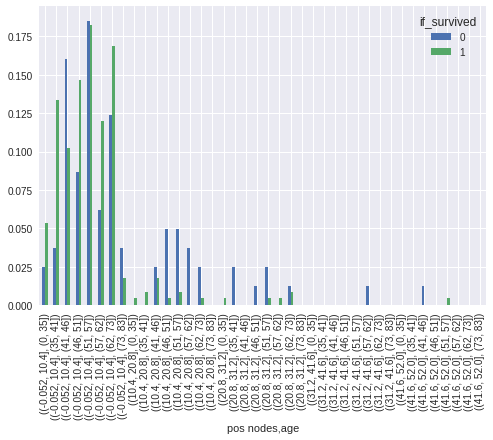

In [76]:
ds2.plot(kind='bar', stacked=False)


## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive correlation with survival?
- What is at least one feature that looks to have a negative correlation with survival?
- How are those two features related with each other, and what might that mean?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

Patients, who were operated before 41 years old, or after 78 years old, tend to survive more often. The data shows that after the age of 41 the probability of survival after a breast cancer operation  drops dramatically, from 86%  for patients before 41 years old, to 77% at the age of 41 and 42% at the age of 46. 
The number of positive axillary nodes are the highest at the age ranges where survival probability is low. The features contributing to survival rate have positive correlation, they are confounding. More domain specific data is required to detect which of the features cause another one, at the same time following intuitive logic, age might be the factor causing the number of positive axillary nodes to increase.